# Biostat Assignment 5    
J. Cristiano      
11/11/2024      


### Question 1
Outline the conditions required for linear correlation analysis and contrast them with the conditions for linear regression analysis.      

#### Conditions for Linear Correlation Analysis

1. **Quantitative Variables**: Both variables must be continuous or interval-scale.
2. **Linearity**: The relationship between the variables should be approximately linear, as correlation measures the strength of a linear association.
3. **No Outliers**: Outliers can skew the correlation coefficient, so it’s important to identify and handle them appropriately.
4. **Homoscedasticity (optional)**: Although not strictly necessary, homoscedasticity (constant variance) is desirable for a meaningful interpretation of correlation.

#### Conditions for Linear Regression Analysis

1. **Quantitative Variables**: The predictor (independent) and outcome (dependent) variables should be continuous.
2. **Linearity**: The relationship between the independent and dependent variables should be linear. This assumption can be checked by examining residual plots.
3. **Independence of Errors**: Observations should be independent, and the residuals should not show patterns over time or across observations.
4. **Homoscedasticity of Errors**: The residuals should have constant variance across all levels of the independent variable.
5. **Normality of Errors**: The residuals (differences between observed and predicted values) should be normally distributed, especially for inference purposes (e.g., confidence intervals, hypothesis testing).

#### Key Differences Between Correlation and Regression Conditions

- **Purpose**: Correlation analysis measures the strength and direction of a linear association between two variables, while regression predicts values of the dependent variable based on the independent variable(s).
- **Symmetry**: Correlation does not differentiate between independent and dependent variables; the association is symmetric. Regression requires a clear distinction, as it models the dependent variable as a function of the independent variable(s).
- **Assumptions on Residuals**: Linear regression analysis imposes more stringent requirements on residuals (normality, homoscedasticity, independence), while correlation mainly focuses on linearity and absence of outliers.

In summary, correlation analysis has fewer and generally less restrictive assumptions, while linear regression analysis requires additional conditions for residuals to ensure valid inference and prediction.



### Question 2 
The following data were collected to investigate teh relationship betgween mean annual temperatrue and mortality rate for a type of breast cancer in women. 

| Mean annual temp (°F) | Mortality index |
|-----------------------|-----------------|
| 31.8                  | 67.3            |
| 34.0                  | 52.5            |
| 40.2                  | 68.1            |
| 42.1                  | 84.6            |
| 42.3                  | 65.1            |
| 43.5                  | 72.2            |
| 44.2                  | 81.7            |
| 45.1                  | 89.2            |
| 46.3                  | 78.9            |
| 47.3                  | 88.6            |
| 47.8                  | 95.0            |
| 48.5                  | 87.0            |
| 49.2                  | 95.9            |
| 49.9                  | 104.5           |
| 50.0                  | 100.4           |
| 51.3                  | 102.5           |


In [2]:
import pandas as pd

# Creating a DataFrame with the data
data = {
    "Mean_annual_temp_F": [
        31.8, 34.0, 40.2, 42.1, 42.3, 43.5, 44.2, 45.1, 46.3, 
        47.3, 47.8, 48.5, 49.2, 49.9, 50.0, 51.3
    ],
    "Mortality_index": [
        67.3, 52.5, 68.1, 84.6, 65.1, 72.2, 81.7, 89.2, 78.9, 
        88.6, 95.0, 87.0, 95.9, 104.5, 100.4, 102.5
    ]
}

df = pd.DataFrame(data)

In [3]:
# Pearson's correlation coefficient
pearson_corr = df.corr(method='pearson')
print("Pearson's correlation coefficient:")
print(pearson_corr)

# Spearman's rank correlation coefficient
spearman_corr = df.corr(method='spearman')
print("\nSpearman's rank correlation coefficient:")
print(spearman_corr)

# Kendall's rank correlation coefficient
kendall_corr = df.corr(method='kendall')
print("\nKendall's rank correlation coefficient:")
print(kendall_corr)

Pearson's correlation coefficient:
                    Mean_annual_temp_F  Mortality_index
Mean_annual_temp_F            1.000000         0.874854
Mortality_index               0.874854         1.000000

Spearman's rank correlation coefficient:
                    Mean_annual_temp_F  Mortality_index
Mean_annual_temp_F            1.000000         0.902941
Mortality_index               0.902941         1.000000

Kendall's rank correlation coefficient:
                    Mean_annual_temp_F  Mortality_index
Mean_annual_temp_F                1.00             0.75
Mortality_index                   0.75             1.00


These results generally suggest that an increase in average annual temperature is correlated with higher mortality. The Pearson correlation coefficient (r = 0.875) shows a strong linear relationship (provided that the relationship is indeed linear and both variables are normally distributed). However, the Spearman's Rank correlation coefficient is slightly higher (r = 0.903) which suggests that the relationship between the 2 variables can be described by a monotonic function that is not strictly linear. Kendall's Rank correlation coefficient is numerically lower than the others, but it still suggesting high correlation, despite some outliers. My interpretation of this is that there does exist a linear relationship between mean annual temperature and mortality index and that large spikes (deviations from strict linearity) in temperature happen which also causes a cooresponding spike in mortality.  

### Question 3 
The following table presents sample data relating the daily number of cigarettes smoked by heavy smokers in a health care prgram and their diastolic blood pressure measurements (in mm Hg):

| Sampled patient                   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
|-----------------------------------|-----|-----|-----|-----|-----|-----|-----|-----|
| Number of cigarettes smoked       | 20  | 10  | 34  | 23  | 27  | 32  | 18  | 22  |
| Diastolic blood pressure (in mm Hg) | 64  | 61  | 84  | 70  | 88  | 92  | 72  | 77  |


In [4]:
# Creating a DataFrame with the data
data = {
    "Sampled_patient": [1, 2, 3, 4, 5, 6, 7, 8],
    "Cigarettes_smoked": [20, 10, 34, 23, 27, 32, 18, 22],
    "Diastolic_BP_mmHg": [64, 61, 84, 70, 88, 92, 72, 77]
}

df = pd.DataFrame(data)

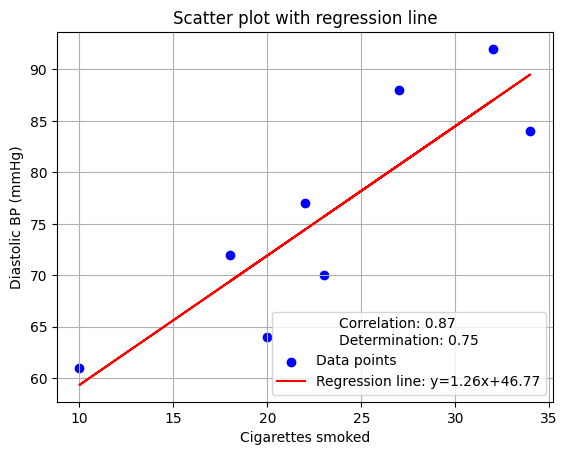

In [6]:
import matplotlib.pyplot as plt
from scipy import stats

# Scatter plot
plt.scatter(df["Cigarettes_smoked"], df["Diastolic_BP_mmHg"], color='blue', label='Data points')

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Cigarettes_smoked"], df["Diastolic_BP_mmHg"])

# Regression line
regression_line = slope * df["Cigarettes_smoked"] + intercept
plt.plot(df["Cigarettes_smoked"], regression_line, color='red', label=f'Regression line: y={slope:.2f}x+{intercept:.2f}')

# Coefficients
correlation_coefficient = r_value
determination_coefficient = r_value**2

# Plot details
plt.xlabel("Cigarettes smoked")
plt.ylabel("Diastolic BP (mmHg)")
plt.title("Scatter plot with regression line")
plt.legend(loc='lower right', title=f'Correlation: {correlation_coefficient:.2f}\nDetermination: {determination_coefficient:.2f}')
plt.grid(True)

# Show plot
plt.show()

Looking at the graph, we can see a pretty strong linear correlation (r = 0.87) between daily cigarettes consumed and diastolic blood pressure. However, the fit of the model to the data is slightly smaller (r^2 = 0.87) which can also be confirmed by the dispersion that you can see in the graph. 

### Question 4
 When purifying drinking water you can use a so-called membrane filtration.  In an experiment one wishes to examine the relationship between the pressure drop across a membrane and the flux (flow per area) through the membrane.
We observe the following 10 related values of pressure (x) and flux (y):

| Sample                | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   |
|-----------------------|------|------|------|------|------|------|------|------|------|------|
| Pressure (x)          | 1.02 | 2.08 | 2.89 | 4.01 | 5.32 | 5.83 | 7.26 | 7.96 | 9.11 | 9.99 |
| Flux (y)              | 1.15 | 0.85 | 1.56 | 1.72 | 4.32 | 5.07 | 5.00 | 5.31 | 6.17 | 7.04 |

In [9]:
# Creating a DataFrame with the data
data = {
    "Pressure_x": [1.02, 2.08, 2.89, 4.01, 5.32, 5.83, 7.26, 7.96, 9.11, 9.99],
    "Flux_y": [1.15, 0.85, 1.56, 1.72, 4.32, 5.07, 5.00, 5.31, 6.17, 7.04]
}

df = pd.DataFrame(data)

#### What is the estimated correlation between pressure and flux? Give an interpretation of the correlation.

In [10]:
# Pearson's correlation coefficient for the new DataFrame
pearson_corr_new_df = df.corr(method='pearson')
print("Pearson's correlation coefficient for the new DataFrame:")
print(pearson_corr_new_df)

Pearson's correlation coefficient for the new DataFrame:
            Pressure_x    Flux_y
Pressure_x    1.000000  0.963818
Flux_y        0.963818  1.000000


The coorelation coefficient is very high, indicating that the Pressure and Flux are highly correlated. 

#### 2) Provide the linear regression model  (flux, y, is the outcome) by the least square method.

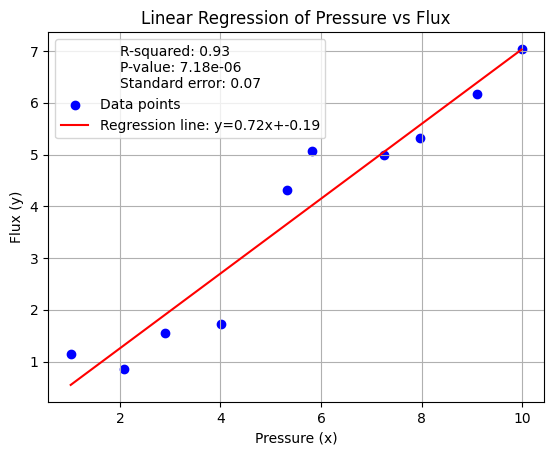

In [12]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Pressure_x"], df["Flux_y"])

# Plot the data and the regression line
plt.scatter(df["Pressure_x"], df["Flux_y"], color='blue', label='Data points')
regression_line = slope * df["Pressure_x"] + intercept
plt.plot(df["Pressure_x"], regression_line, color='red', label=f'Regression line: y={slope:.2f}x+{intercept:.2f}')

# Plot details
plt.xlabel("Pressure (x)")
plt.ylabel("Flux (y)")
plt.title("Linear Regression of Pressure vs Flux")
plt.legend(loc='best', title=f'R-squared: {r_value**2:.2f}\nP-value: {p_value:.2e}\nStandard error: {std_err:.2f}')
plt.grid(True)

# Show plot
plt.show()


#### 3) Interpret the slope in the the linear regression model. Construct a 95% confidence interval for the slope in the simple linear regression model. 
The trendline and its formula show a positive association between pressure and flux, and flux tends to rise as pressure increases. 

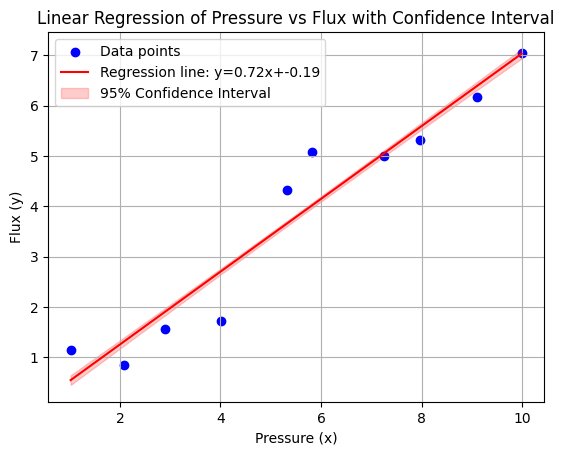

In [13]:
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

# Calculate the confidence interval
confidence_level = 0.95
degrees_freedom = len(df) - 2
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)

# Standard error of the regression line
predicted_y = regression_line
mean_x = np.mean(df["Pressure_x"])
n = len(df)
se = std_err * np.sqrt(1/n + (df["Pressure_x"] - mean_x)**2 / np.sum((df["Pressure_x"] - mean_x)**2))

# Confidence interval
ci = t_value * se

# Plot the data, regression line, and confidence interval
plt.scatter(df["Pressure_x"], df["Flux_y"], color='blue', label='Data points')
plt.plot(df["Pressure_x"], regression_line, color='red', label=f'Regression line: y={slope:.2f}x+{intercept:.2f}')
plt.fill_between(df["Pressure_x"], predicted_y - ci, predicted_y + ci, color='red', alpha=0.2, label='95% Confidence Interval')

# Plot details
plt.xlabel("Pressure (x)")
plt.ylabel("Flux (y)")
plt.title("Linear Regression of Pressure vs Flux with Confidence Interval")
plt.legend(loc='best')
plt.grid(True)

# Show plot
plt.show()

#### 4)  How large a part of the flux-variation is not explained by pressure differences?
7 % of the variation in flux is not explained by the pressure
